March: Story of winds for 3 cases and incoming velocitity for 6 cases.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import ticker
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
x_start = 200; x_end = 230; y_start = 45; y_end = 190
dep_start = 2; dep_end = 6; dep_break = 9

fname = "1_MCKNZ_1h_20170101_201701*"

In [3]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_half/'
vozocrtx_h, umask_h, umask_all_h, depthu_h, sozotaux_h = quicklook.get_vars_for_box(dirname, fname, x_start, x_end, y_start, y_end)
avgU_all_ys_h, avgU_all_depths_h, avgU_box_depths_h, avgU_absolute_h = quicklook.calculate_avgU(vozocrtx_h, dep_start, dep_end)

dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_base/'
vozocrtx_b, umask_b, umask_all_b, depthu_b, sozotaux_b = quicklook.get_vars_for_box(dirname, fname, x_start, x_end, y_start, y_end)
avgU_all_ys_b, avgU_all_depths_b, avgU_box_depths_b, avgU_absolute_b = quicklook.calculate_avgU(vozocrtx_b, dep_start, dep_end)

dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_double/'
vozocrtx_d, umask_d, umask_all_d, depthu_d, sozotaux_d = quicklook.get_vars_for_box(dirname, fname, x_start, x_end, y_start, y_end)
avgU_all_ys_d, avgU_all_depths_d, avgU_box_depths_d, avgU_absolute_d = quicklook.calculate_avgU(vozocrtx_d, dep_start, dep_end)

In [4]:
x_start = 165
x_end = 175
y_start = 120
y_end = 200
dep_start = 2
dep_end = 4
dep_break = 9

In [5]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_half/'
vozocrtx_hr, umask_hr, umask_all_hr, depthu_hr, sozotaux_hr = quicklook.get_vars_for_box(dirname, fname, x_start, x_end, y_start, y_end)
avgU_all_ys_hr, avgU_all_depths_hr, avgU_box_depths_hr, avgU_absolute_hr = quicklook.calculate_avgU(vozocrtx_hr, dep_start, dep_end)

dirname='/ocean/imachuca/Canyons/results_mackenzie/initial_collection/real_base/'
vozocrtx_br, umask_br, umask_all_br, depthu_br, sozotaux_br = quicklook.get_vars_for_box(dirname, fname, x_start, x_end, y_start, y_end)
avgU_all_ys_br, avgU_all_depths_br, avgU_box_depths_br, avgU_absolute_br = quicklook.calculate_avgU(vozocrtx_br, dep_start, dep_end)

In [6]:
def plot_incoming_velocity(y_start, y_end, x_start, x_end, dep_start, dep_end,
                           umask_all,
                           avgU_absolute_h, sozotaux_h,
                           avgU_absolute_b, sozotaux_b,
                           avgU_absolute_d, sozotaux_d,
                          avgU_absolute_hr, sozotaux_hr,
                          avgU_absolute_br, sozotaux_br):
    
    cmap = LinearSegmentedColormap.from_list('mycmap', ['wheat', 'white'])
    
    convert_to_distance = 2/3 
    xs = np.arange(umask_all.shape[-1]) * convert_to_distance
    ys = np.arange(umask_all.shape[-2]) * convert_to_distance
    zs = np.arange(umask_all.shape[-3])

    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2])
    ax1 = plt.subplot(gs[0])
    ax4 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    ax2 = plt.subplot(gs[3])

    s = ax1.pcolormesh(xs, ys, umask_all[9, :,:], cmap=cmap)
    ax1.set_aspect(aspect='equal')
    ax1.add_patch(patches.Rectangle((x_start * convert_to_distance, y_start * convert_to_distance),
                                    (x_end-x_start) * convert_to_distance,(y_end-y_start) * convert_to_distance, 
                                    fill=False, linewidth=3))
    ax1.set_xlim([0, xs[-1]])
    ax1.set_ylim([0, ys[-1]])
    ax1.set_xlabel('Alongshore Distance [km]', fontsize = 15)
    ax1.set_ylabel('Cross-shore Distance [km]', fontsize = 15)

    sc = ax3.pcolormesh(ys, zs, umask_all[:, :, x_start], cmap=cmap)
    ax3.add_patch(patches.Rectangle((y_start * convert_to_distance, dep_start),(y_end-y_start) * convert_to_distance, 
                                    dep_end-dep_start, fill=False, linewidth=3))
    ax3.set_ylim([zs[-1], 0])
    ax3.set_xlim([0, ys[-1]])
    ax3.set_ylabel('Z Indices', fontsize = 15)
    ax3.set_xlabel('Cross-shore Distance [km]', fontsize = 15)

    # ---------------------------

    
    avgU_absolute_smoothed_h = general_functions.smooth(avgU_absolute_h[:], 12)
    #ax2.plot(avgU_absolute_h, c='gray', lw=2, alpha=0.8)
    ax2.plot(avgU_absolute_smoothed_h * 100, c='darkgray', lw=2, label='ideal half')
    
    avgU_absolute_smoothed_b = general_functions.smooth(avgU_absolute_b[:], 12)
    #ax2.plot(avgU_absolute_b, c='gray', lw=2, alpha=0.8)
    ax2.plot(avgU_absolute_smoothed_b * 100, c='dimgray', lw=2, label='ideal base')
    
    avgU_absolute_smoothed_d = general_functions.smooth(avgU_absolute_d[:], 12)
    #ax2.plot(avgU_absolute_d, c='gray', lw=2, alpha=0.8)
    ax2.plot(avgU_absolute_smoothed_d * 100, c='k', lw=2, label='ideal double')
    
    avgU_absolute_smoothed_hr = general_functions.smooth(avgU_absolute_hr[:], 12)
    #ax2.plot(avgU_absolute_h, c='gray', lw=2, alpha=0.8)
    ax2.plot(avgU_absolute_smoothed_hr * 100, c='darkgray', linestyle='--', lw=2, label='real half')
    
    avgU_absolute_smoothed_br = general_functions.smooth(avgU_absolute_br[:], 12)
    #ax2.plot(avgU_absolute_b, c='gray', lw=2, alpha=0.8)
    ax2.plot(avgU_absolute_smoothed_br * 100, c='dimgray', linestyle='--', lw=2, label='real base')
    
    ax2.legend(loc=2, ncol=5, fontsize=15)
    
    print('velocities')
    print(avgU_absolute_smoothed_h.min()* 100, np.mean(avgU_absolute_smoothed_h)*100)
    print(avgU_absolute_smoothed_b.min()* 100, np.mean(avgU_absolute_smoothed_b)*100)
    print(avgU_absolute_smoothed_d.min()* 100, np.mean(avgU_absolute_smoothed_d)*100)
    print(avgU_absolute_smoothed_hr.min()* 100, np.mean(avgU_absolute_smoothed_hr)*100)
    print(avgU_absolute_smoothed_br.min()* 100, np.mean(avgU_absolute_smoothed_br)*100)
    
    # ---------------------------
    
    ax2.set_title('Incoming Velocity', fontsize=20)
    ax2.set_xlabel('Time [hours]', fontsize=15)
    ax2.set_ylabel('[cms$^{-1}$]', fontsize=20)
    ax2.set_xlim([0, 5*24])
    ax2.set_ylim([-50, 30])
    ml = MultipleLocator(24)
    ax2.xaxis.set_minor_locator(ml)
    ax2.xaxis.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax2.axhline(0, linestyle='--', c='darkgoldenrod')

    # ---------------------------
    ax4.plot(sozotaux_h, c='darkgray', lw=2, label='half')
    ax4.plot(sozotaux_b, c='dimgray', lw=2, label='base')
    ax4.plot(sozotaux_d, c='k', lw=2, label='double')
    
    ax4.legend(loc=2, ncol=3, fontsize=15)
    
    print('winds')
    print(sozotaux_h.min())
    print(sozotaux_b.min())
    print(sozotaux_d.min())
    # ---------------------------
    
    ax4.set_title('Wind Stress', fontsize=20)
    ax4.set_xlabel('Time [hours]', fontsize=15)
    ax4.set_ylabel('[Nm$^{-2}$]', fontsize=20)
    ax4.set_xlim([0, 5*24])
    ax4.set_ylim([-2.0, 1.0])
    ml = MultipleLocator(24)
    ax4.xaxis.set_minor_locator(ml)
    ax4.xaxis.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax4.axhline(0, linestyle='--', c='darkgoldenrod')

    fig.tight_layout(w_pad=5.5, h_pad=3.5)
    return fig

velocities
-13.5505396838 -8.24559434657
-25.7292823208 -12.5395919618
-46.0746245319 -19.9929515884
-13.0884607414 -10.8808844996
-20.5795810147 -17.7031138286
winds
-0.425345
-0.85069
-1.70138


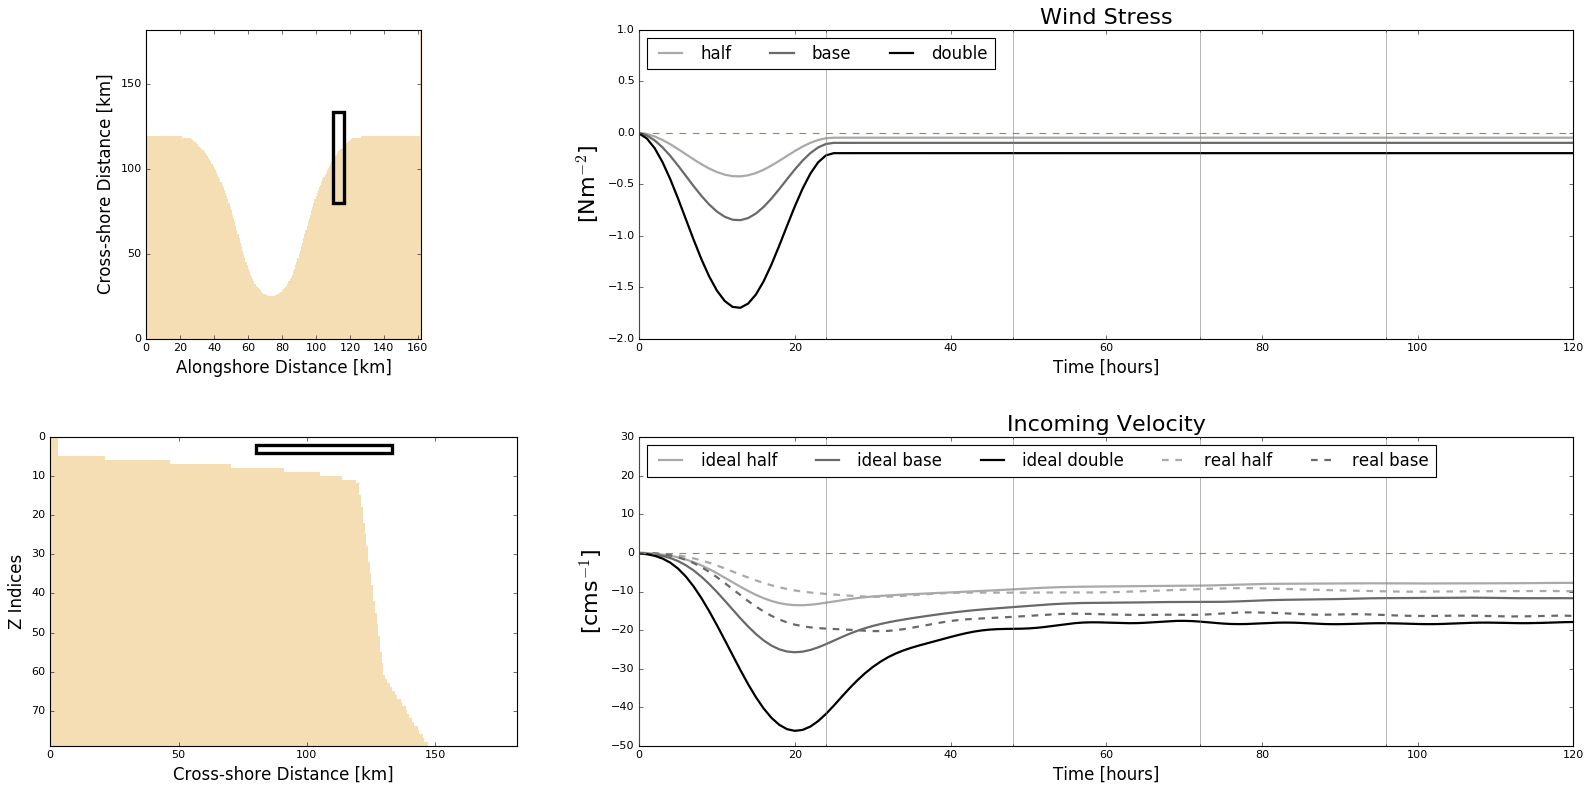

In [7]:
fig = plot_incoming_velocity(y_start, y_end, x_start, x_end, dep_start, dep_end,
                           umask_all_h,
                           avgU_absolute_h, sozotaux_h,
                           avgU_absolute_b, sozotaux_b,
                           avgU_absolute_d, sozotaux_d,
                             avgU_absolute_hr, sozotaux_hr,
                             avgU_absolute_br, sozotaux_br)
fig.savefig('incoming_velocities.png', dpi=400)